In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import random
from scipy import stats

In [4]:
df = pd.read_csv('c:\\value_added_excel\\diabetes.csv')
df.head(10)

    # Our goal is to predict whether the person has diabetes or not using BMI and Glucose level.

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0
5,86,31.12,0
6,141,41.76,1
7,160,29.60,1
8,88,29.86,0
9,91,35.34,0


In [5]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [6]:
X = df.iloc[:,:-1].to_numpy()
#select all rows except target variable
y = df.iloc[:,-1].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

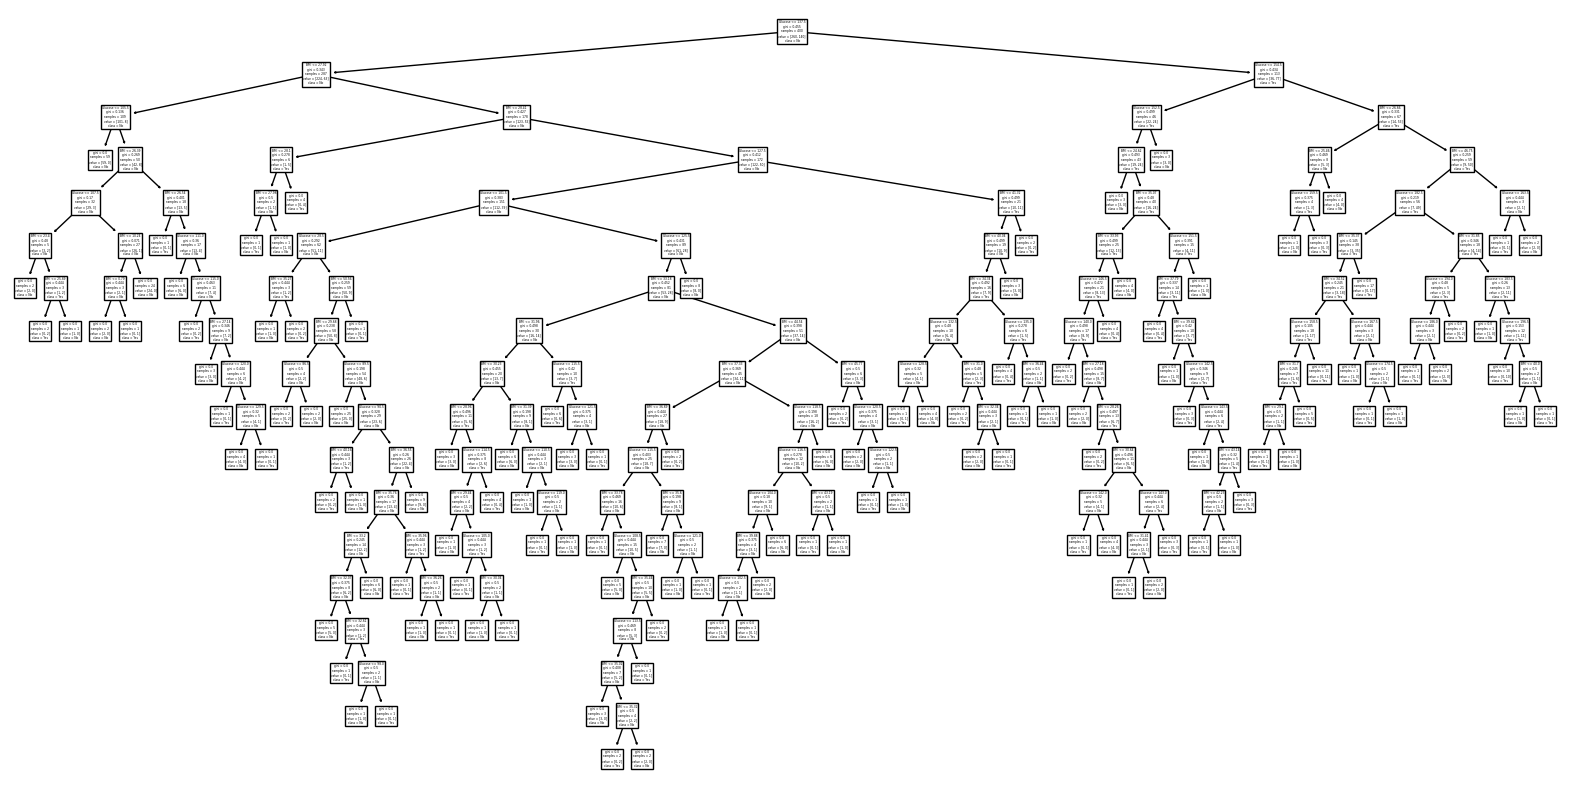

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No','Yes'])
plt.show()

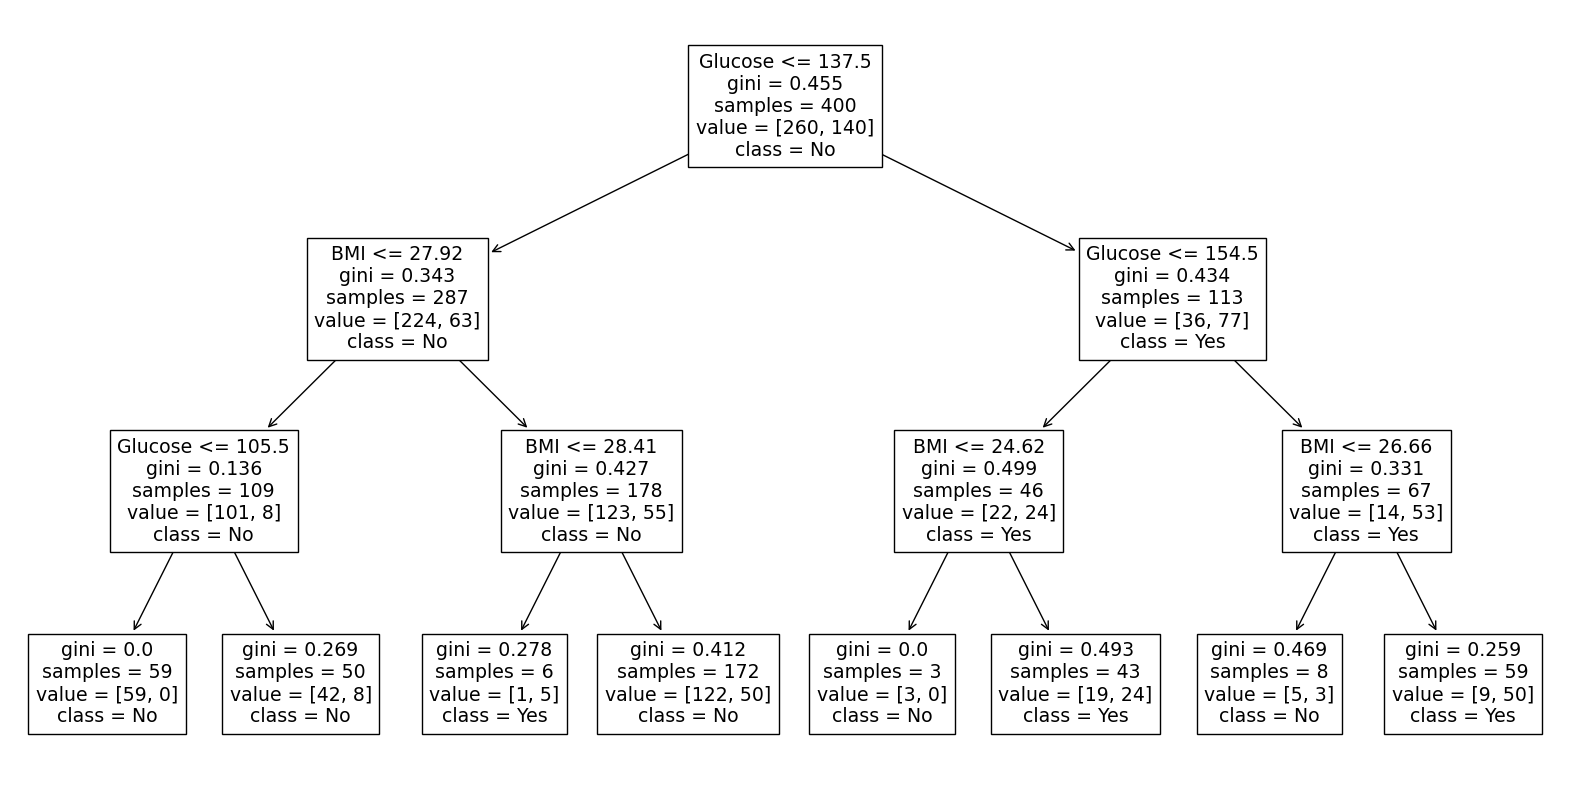

array([0, 1], dtype=int64)

In [10]:
clf.set_params(max_depth = 3)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No','Yes'])
plt.show()
clf.predict([[90, 20], [200, 30]])

In [13]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
print(accuracy)

0.7125


In [14]:
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators = 200, max_depth=3, random_state=0)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
print(accuracy)

0.725


# Support Vector Machine(SVM)
# Binary Classification
_____________________

* A task of classifying instances into two classes.
* For binary classification SVM tries to find out a boundary(hyperplane) that seperates the instances into two classes.
* SVM vector works by finding a hyperplane that maximizes the distance between the plane and the closest data points.

# Non Linear SVM model
____________________

* If the data was more convoluted and a straight line could not seperate the two classes well we need to use a non linear SVM.
* Here we use polynomial regression instead of linear regression.
* To seperate data that is not linear seperable,map the data to a higher dimensional space.
* In the figure the dataset on top(x) is not seperable by linear line we can map it to a 2d space by adding a new dimension x^2.
* Example: x=-3 and x^2=9 can be mapped

# Kernel trick
____________

* To use kernel trick,pass a kernel hyper parameter to the SVM model when instantiating it.
* The kernels available in sklearn are 
     * 1. linear 
     * 2. poly
     * 3. rbf(default)
     * 4. sigmoid
     * 5. precomputed

# Multiclass Classification
_________________________
* multiple classes we can use any one of the following curistic methods.
    * 1.OvR(One-vs-Rest)
    * 2.OvO(One-vs-One)

# One-vs-Rest
___________

* We need to classify our dataset into three classes class1,class2,class3
* OvR splits the problem into binary classification problem as follows
     *  1. class1 vs not class1(class2 and class3 are combined to not class1)
     *  2. class2 vs not class2
     *  3. class3 vs not class3
* The binary classifier is trained on each problem and decision score is generated for each classifier.
* The output of the classifier with the highest score is selected.

# One-vs-One
__________

* This method trains the binary classifier for each pair of classes and selects the class with the most votes.
* class1 vs class2     
* class1 vs class3
* class2 vs class3

# OvR and OvO

* sklearn provides two classes 
     * 1.OneVsOneClassifier
     * 2.OneVsRestClassifier

# OvR and OvO

* sklearn provides two classes 
     * 1.OneVsOneClassifier
     * 2.OneVsRestClassifier

In [2]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()

NameError: name 'cross_val_score' is not defined